### Evaluating and visualizing gene ontology (GO) terms associated with algal and bacterial peptides in degradation experiment

#### Beginning with: GO term abundances in spreadsheets

#### Goal: heatmaps of algal and bacterial GO terms over the 4 timepoints

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [60]:
# read the data into pandas dataframes
diatom = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/unipept/GO-terms/diatom-GO-cc.csv", index_col=0)

diatom.head()

# rename columns
names = ['Day 0 endo.', 'Day 2 endo.', 'Day 5 endo.', 'Day 12 endo.', \
        'Day 0 exo.', 'Day 2 exo.', 'Day 5 exo.', 'Day 12 exo.']
diatom.columns = names

bacteria = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/unipept/GO-terms/bacteria-GO-cc.csv", index_col=0)

#bacteria.columns = names

diatom.head()

,Day 0 endo.,Day 2 endo.,Day 5 endo.,Day 12 endo.,Day 0 exo.,Day 2 exo.,Day 5 exo.,Day 12 exo.
GO term,,,,,,,,
GO:0009538 photosystem I reaction center,8.0,2.0,8.0,7.0,NaN,7.0,NaN,NaN
GO:0009507 chloroplast,46.0,2.0,34.0,30.0,3.0,35.0,NaN,NaN
GO:0016021 integral component of membrane,41.0,3.0,28.0,24.0,2.0,19.0,NaN,NaN
GO:0009536 plastid,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
GO:0005886 plasma membrane,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# read the data into pandas dataframes
diatom_endo = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/unipept/GO-terms/diatom-GO-cc-ENDO.csv", index_col=0)

diatom_exo = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/unipept/GO-terms/diatom-GO-cc-EXO.csv", index_col=0)

# rename columns
names = ['Day 0', 'Day 2', 'Day 5', 'Day 12']

diatom_endo.columns = names
diatom_exo.columns = names

diatom_endo.head()

,Day 0,Day 2,Day 5,Day 12
GO term,,,,
GO:0009538 photosystem I reaction center,8.0,2.0,8.0,7.0
GO:0009507 chloroplast,46.0,2.0,34.0,30.0
GO:0016021 integral component of membrane,41.0,3.0,28.0,24.0
GO:0009536 plastid,NaN,NaN,NaN,1.0
GO:0005886 plasma membrane,NaN,1.0,NaN,NaN


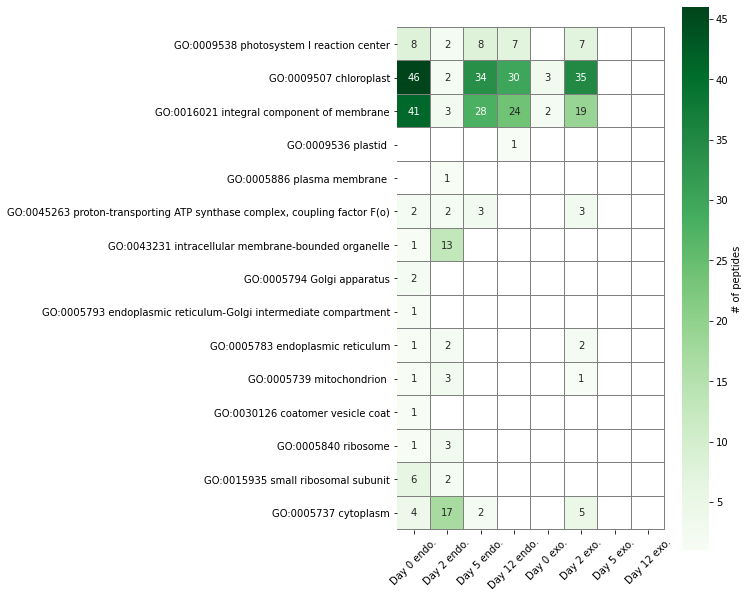

In [71]:
# plot heatmap

f,(ax1) = plt.subplots(1,sharey=True, sharex=True, figsize=(6, 10))

ax1 = sns.heatmap(diatom, cmap="Greens", annot=True, linecolor = 'grey', linewidths=.01, \
                square=True, cbar_kws={'label': '# of peptides'})

ax1.set_ylabel('')

# turn the axis label
for item in ax1.get_yticklabels():
    item.set_rotation(0)

for item in ax1.get_xticklabels():
    item.set_rotation(45)

# save figure
#plt.savefig('seabornPandas.png', dpi=300)
plt.show()

Text(0.5, 101.65714285714279, 'Exogenous')

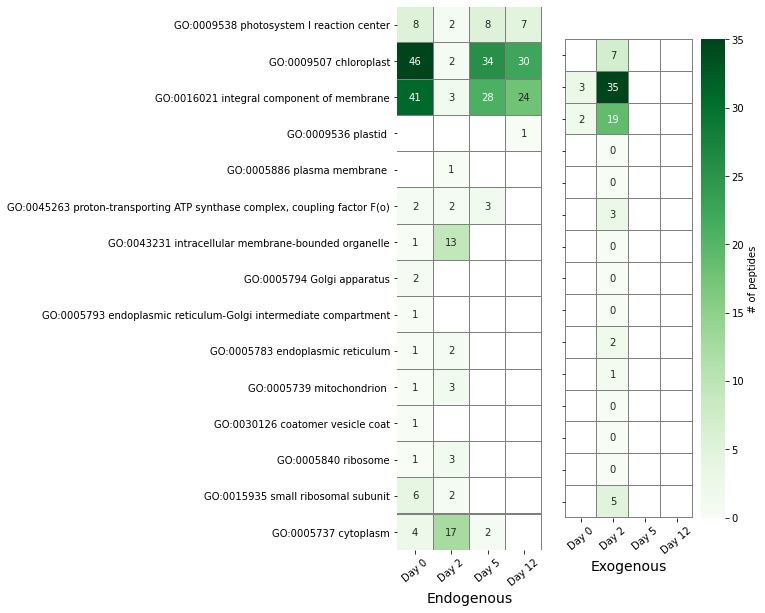

In [58]:
# plot heatmap

f,(ax1,ax2) = plt.subplots(1,2,sharey=True, sharex=True, figsize=(6, 10))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.01)

maskn = diatom_endo.isnull()
maskx = diatom_exo.isnull()

g1 = sns.heatmap(diatom_endo,cmap="Greens",cbar=False,ax=ax1, linecolor = 'grey', linewidths=.01, \
                 mask=maskn, square=True, annot=True)
g1.set_ylabel('')
g1.set_xticklabels(diatom_endo.columns, rotation=40)
g1.set_xlabel('Endogenous', fontsize = 14)


g2 = sns.heatmap(diatom_exo,cmap="Greens",cbar=True,ax=ax2, linecolor = 'grey', linewidths=.01, \
                mask=maskx, vmin = 0, square=True, annot=True, cbar_kws={'label': '# of peptides'})
g2.set_ylabel('')
g2.set_xticklabels(diatom_exo.columns, rotation=40)
g2.set_xlabel('Exogenous', fontsize = 14)

Text(0.5, 69.0, 'Bacteria')

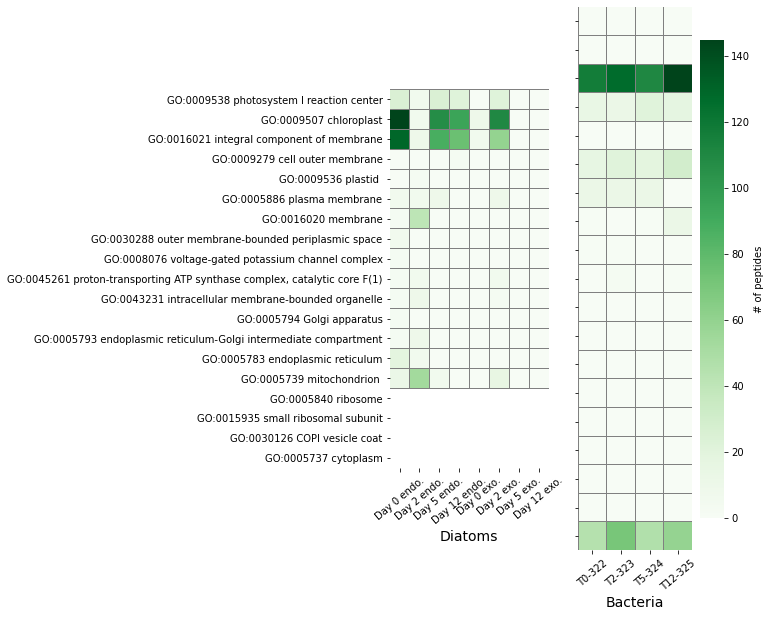

In [15]:
# plot heatmap

f,(ax1,ax2) = plt.subplots(1,2,sharey=True, figsize=(6, 10))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.01)

mask = diatom.isnull()
maskb = bacteria.isnull()


g1 = sns.heatmap(diatom,cmap="Greens",cbar=False,ax=ax1, linecolor = 'grey', linewidths=.01, \
                 mask=mask, square=True)
g1.set_ylabel('')
g1.set_xticklabels(diatom.columns, rotation=40)
g1.set_xlabel('Diatoms', fontsize = 14)


g2 = sns.heatmap(bacteria,cmap="Greens",cbar=True,ax=ax2, linecolor = 'grey', linewidths=.01, \
                mask=maskb, square=True, cbar_kws={'label': '# of peptides'})
g2.set_ylabel('')
g2.set_xticklabels(bacteria.columns, rotation=40)
g2.set_xlabel('Bacteria', fontsize = 14)

array([[ 1.        ,  0.01112885,  0.09118655, -0.00392899,  0.04372059,
        -0.12416781, -0.02233528, -0.02973144,  0.07789597,  0.02653949],
       [ 0.01112885,  1.        , -0.12311011, -0.04596409, -0.07721531,
         0.05886169, -0.08877293, -0.05940085,  0.12236971,  0.08831269],
       [ 0.09118655, -0.12311011,  1.        ,  0.02149686,  0.09598815,
        -0.078215  , -0.02154418, -0.02758756,  0.08430617, -0.02890587],
       [-0.00392899, -0.04596409,  0.02149686,  1.        ,  0.08221417,
        -0.02421263, -0.03793206,  0.05579023, -0.01821216,  0.00804485],
       [ 0.04372059, -0.07721531,  0.09598815,  0.08221417,  1.        ,
        -0.05021376,  0.03489411,  0.01180592, -0.1046717 ,  0.16196212],
       [-0.12416781,  0.05886169, -0.078215  , -0.02421263, -0.05021376,
         1.        , -0.0809692 , -0.01539847,  0.0460595 , -0.0359788 ],
       [-0.02233528, -0.08877293, -0.02154418, -0.03793206,  0.03489411,
        -0.0809692 ,  1.        ,  0.09585605

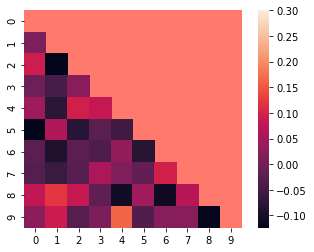

In [49]:
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
g = sns.heatmap(corr, mask=mask, vmax=.3, square=True)
g.set_facecolor('xkcd:salmon')

corr

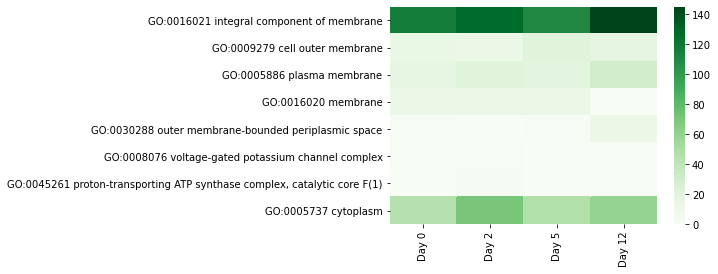

In [43]:
# plot heatmap
ax = sns.heatmap(bacteria, cmap="Greens")

ax.set_ylabel('')

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# save figure
#plt.savefig('seabornPandas.png', dpi=100)
plt.show()